인하공업전문대학교

컴퓨터정보과 3학년 B반

201844045 김연욱

3학년 2학기 빅데이터 교과목 기말고사 프로젝트

주제 : 미세먼지 분석

csv파일 주의 사항

1. *의 값은 자료 획득율이 50% 이상이나 75% 미만인 도시의 월평균 값임

2. **의 값은 자료 획득율이 50% 미만인 측정소의 월평균 값임

3. 관측점 수치가 없는 경우는  장비교체, 장비점검 등으로 인한 결측

In [ ]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
# import문
import pandas as pd
import numpy as np

In [ ]:
# 구글드라이브 연동
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 전역변수 선언부
start_year = 2010
end_year = 2020 # 2021년까지 존재하지만 11월, 12월 데이터 부재로 인한 제외
df_dic = dict() # keys : 각 년도  values : 각 년도에 해당하는 csv파일의 DataFrame
# month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] # 1월부터 12월을 나타낼 리스트
# pm10_list = [] # 입자의 크기가 10마이크로미터(마이크론) 이하인 먼지의 데이터를 나타낼 리스트

In [ ]:
# 함수 정의
def delStar(data): # 데이터상 별표(*) 없애는 함수
  if (len(data) > 2):
    return data.replace('*', '')
  else:
    return data

def changeColumns(df, year): # 데이터프레임의 컬럼명을 변경하는 함수
  df.columns = ['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
  return df

In [ ]:
# 2010년부터 2020년까지의 csv파일 불러오기 (2021년 csv파일도 존재는 하나 11월, 12월 데이터의 부재로 인해 제외)
for year in range(start_year, end_year + 1):
  df = pd.read_csv(f'/content/drive/MyDrive/빅데이터 프로젝트/미세먼지 자료/{year}.csv', encoding='cp949') # encoding을 안하면 오류남 -> cp949는 euc-kr의 확장버전
  changeColumns(df, year) # 컬럼명 변경 함수 호출
  df_dic[f'{year}년'] = df

In [ ]:
# 데이터 표준화 과정
for df in df_dic.values():
  for month in range(1, 13):
    df[f'{month}월'] = df[f'{month}월'].astype(str) # 열의 데이터가 전부 정수일 경우 그 열은 타입이 int로 되어서 표준화? 정규화?를 위해 str타입으로 전부 변경
    df[f'{month}월'] = df.apply(lambda x: delStar(x[f'{month}월']), axis = 1) # 별표(*) 없애기

  df.replace('-', np.nan, inplace = True) # 누락 데이터 표준화
  df.loc[:, '1월':'12월'] = df.loc[:, '1월':'12월'].astype(float) # 1월부터 12월의 열 타입을 float으로 변경 (mean()을 위해)

In [ ]:
# print(df_dic.keys())
# print(df_dic.values())
for test in df_dic:
  print(test)
  print(test == '2010년')

2010년
True
2011년
False
2012년
False
2013년
False
2014년
False
2015년
False
2016년
False
2017년
False
2018년
False
2019년
False
2020년
False


In [ ]:
year_group = df_dic['2013년'].groupby(['구분2'])
for key, group in year_group:
    test = year_group.get_group(key).iloc[:, 3:].mean()
    # print(test.index)
    # print()
    print('key : ', key)
    print(year_group.get_group(key))
    print(f'평균 : {test}')
    print('타입 : ', type(group.iloc[0, 4]))
    print('test타입 : ', type(test))

       년도   미세먼지 합  데이터 개수   연 평균
0   2010년  14644.0   299.0  48.98
1   2011년  14282.0   300.0  47.61
2   2012년  12339.0   300.0  41.13
3   2013년  13391.0   300.0  44.64
4   2014년  13812.0   300.0  46.04
5   2015년  13659.0   300.0  45.53
6   2016년  14342.0   300.0  47.81
7   2017년  13131.0   300.0  43.77
8   2018년  11970.0   300.0  39.90
9   2019년  12485.0   299.0  41.76
10  2020년  10600.0   300.0  35.33


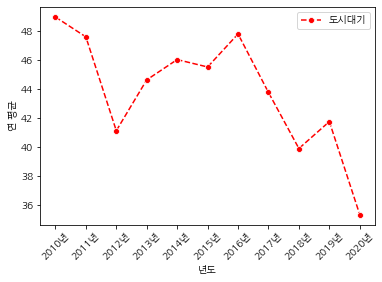

In [ ]:
# 10주차 9p~ lineplot
import seaborn as sns

# for i,v in pd_series.items():
#     print('인덱스 = %s : 값 %s' %(i,v))
# [출처] 파이썬 pandas (1) Series 객체 다루기|작성자 은택이

# 서울의 년도별 도시대기의 미세먼지 평균 변화량 구해보기
my_df = pd.DataFrame(index = df_dic.keys())
# print(my_df)
for year in df_dic.keys():
  grouped = df_dic[year].groupby(['구분1', '구분2'])
  my_df.loc[year, '미세먼지 합'] = grouped.get_group(("도시대기", "서울")).sum()['1월':'12월'].sum()
  my_df.loc[year, '데이터 개수'] = grouped.get_group(("도시대기", "서울")).count()['1월':'12월'].sum()
  my_df.loc[year, '연 평균'] = round(my_df.loc[year, '미세먼지 합'] / my_df.loc[year, '데이터 개수'], 2)
# print(my_df)  
my_df.reset_index(inplace = True) # 행 인덱스 초기화
my_df.rename(columns = {'index' : '년도'}, inplace = True)
sns.lineplot(data = my_df, x = '년도' , y = '연 평균', marker = 'o', color = 'r', linestyle = '--', label = '도시대기')
plt.xticks(rotation=45) # x축 회전 / x축 간격도 설정 가능할 듯
print(my_df)

      구분1 구분2   구분3   구분4    1월    2월    3월    4월    5월    6월    7월    8월  \
0    도시대기  서울    중구  서소문동  58.0  50.0  65.0  51.0  57.0  48.0  30.0  31.0   
1    도시대기  서울   종로구   효제동  59.0  50.0  57.0  49.0  56.0  56.0  42.0  39.0   
2    도시대기  서울   중랑구   면목동  60.0  48.0  63.0  49.0  55.0  50.0  31.0  32.0   
3    도시대기  서울  동대문구   용두동  63.0  52.0  65.0  51.0  58.0  53.0  33.0  33.0   
4    도시대기  서울   은평구   불광동  52.0  46.0  60.0  48.0  56.0  48.0  32.0  31.0   
..    ...  ..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
235  도시대기  경남    양산   북부동  35.0  34.0  54.0  36.0  42.0  33.0  28.0  27.0   
236  도시대기  경남    양산   웅상읍  36.0  33.0  52.0  36.0  44.0  36.0  25.0  28.0   
237  도시대기  제주    제주   이도동  45.0  44.0  76.0  55.0  68.0  44.0  35.0  32.0   
238  도시대기  제주    제주    연동  61.0  42.0  66.0  44.0  53.0  34.0  27.0  26.0   
239  도시대기  제주   서귀포   동홍동  56.0  38.0  70.0  43.0  52.0  34.0  30.0  27.0   

       9월   10월    11월   12월  
0    25.0  40.0   70.0  63.0  
1    31.0  44

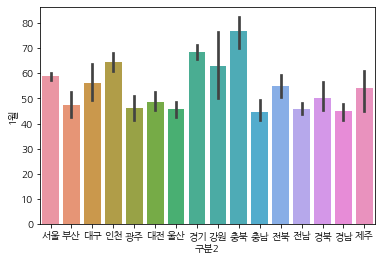

In [ ]:
# 10주차 14p barplot

# 2010년 구분2를 기준으로 각 지역 도시대기 미세먼지 데이터
###################
# 2010년 각 지역의 연 평균
grouped = df_dic['2010년'].groupby(['구분1'])
print(grouped.get_group('도시대기'))

my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique()) # columns = ['미세먼지 합', '데이터 개수', '평균']
# for area in my_df.index:
#   my_df.loc[area, '미세먼지 합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'].sum()
#   my_df.loc[area, '데이터 개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월'].sum()
#   my_df.loc[area, '평균'] = round(my_df.loc[area, '미세먼지 합'] / my_df.loc[area, '데이터 개수'], 2)
#   my_df.loc[area, '최대값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].max()['1월':'12월'].max()
#   my_df.loc[area, '최소값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].min()['1월':'12월'].min()
for area in my_df.index:
  my_df.loc[area, '미세먼지 합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월'].sum() # -> 1월만 할거면 맨 뒤 sum 필요 없음
  my_df.loc[area, '데이터 개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월'].sum() # -> 1월만 할거면 맨 뒤 sum 필요 없음
  my_df.loc[area, '평균'] = round(my_df.loc[area, '미세먼지 합'] / my_df.loc[area, '데이터 개수'], 2)
  my_df.loc[area, '최대값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].max()['1월'].max()
  my_df.loc[area, '최소값'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].min()['1월'].min()
###################
sns.barplot(data = grouped.get_group('도시대기'), x = '구분2', y = '1월')
print(my_df)

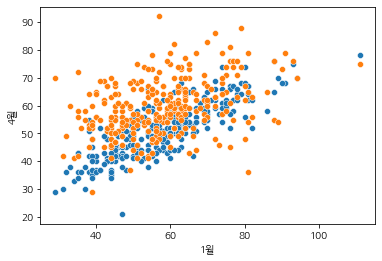

In [ ]:
# 10주차 17p scatterplot

# data쓰면 해당 column명으로 가능하고 data안쓰면 데이터프레임까지 써서 쓰면 됨
sns.scatterplot(data = df_dic['2010년'], x = '1월', y = df_dic['2010년']['4월'])
sns.scatterplot(data = df_dic['2010년'], x = '1월', y = df_dic['2011년']['4월'])

In [ ]:
### 공공데이터 날씨 api 사용
### 이 부분은 일별 데이터 수집으로 예측 모델 만들 때 쓰면 좋을 것 같음
import pandas as pd
import requests
import json

serviceKey = 'lPVMMG%2FF9VQezvJx592%2Fx455LpJ4FjQRXjIlOnLcVEARZcvAV5Ul0%2B7wwrhyTnw6CIFwE0Z5gS2ttyEwSNn2OA%3D%3D' # 일반 인증키
area_df = pd.read_csv('/content/drive/MyDrive/빅데이터 프로젝트/날씨 자료/지역.csv', encoding='cp949') # 날씨 측정 지점코드, 지점명, 관리관서가 담긴 csv파일
df = pd.DataFrame() # csv로 저장할 DataFrame

def searchAreaWeather(area):
  return area

for pageNo in range(1, 20):
  url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
  url += '?serviceKey=' + serviceKey
  url += '&pageNo=' + str(pageNo)
  url += '&numOfRows=900' # 1000미만 가능
  url += '&dataType=JSON'
  url += '&dataCd=ASOS'
  url += '&dateCd=DAY'
  url += '&startDt=20100101'
  url += '&endDt=20201231'
  url += '&stnIds=108'
  response = requests.get(url)
  jsonData = json.loads(response.text)
  if(jsonData['response']['header']['resultMsg'] == 'NO_DATA'): break # 더이상 데이터가 없는 경우
  json_df = pd.json_normalize(jsonData['response']['body']['items']['item'])
  df = pd.concat([df, json_df[['stnNm', 'tm', 'sumRn', 'avgWs', 'maxWd']]], join = 'outer', ignore_index = True) # join : default | ignore_index : 기존 인덱스 무시하고 새로운 행 인덱스 설정

print(df)
# stnNm : 지점명(종관기상관측 지점명)
# tm : 일시
# sumRn : 일강수량(mm)
# avgWs : 평균 풍속(m/s)
# maxWd : 최다 풍향(16방위)

     stnNm          tm sumRn avgWs maxWd
0       서울  2010-01-01         1.9    70
1       서울  2010-01-02   1.4   2.8    70
2       서울  2010-01-03         2.2   290
3       서울  2010-01-04  14.2   3.0    70
4       서울  2010-01-05   0.0   2.9   290
...    ...         ...   ...   ...   ...
4013    서울  2020-12-27   0.0   1.8    70
4014    서울  2020-12-28   1.3   1.4    50
4015    서울  2020-12-29   0.2   2.9   270
4016    서울  2020-12-30         4.1   270
4017    서울  2020-12-31   0.0   2.4   270

[4018 rows x 5 columns]


In [ ]:
sumWs = 0
max = 0

def delAll(date):
  return 'a'

def chkTest(date, avgWs):
  if(date[:7] == '2010-01'):
    return avgWs

def chkMax(date, rn):
  if(date[:7] == '2010-01' & rn > max):
    return rn

df1 = pd.DataFrame()
df1['풍속'] = df.apply(lambda x: chkTest(x['tm'], x['avgWs']), axis = 1)
df1['풍속'] = df1.loc[df1['풍속'].notnull()]
df1['풍속'] = df1['풍속'].astype(float)
print(df1['풍속'].sum() / df1['풍속'].count())

##
# print(df1.loc[4013:, '풍속'] == None)
# print(df1.loc[4013:, '풍속'] == 'None')
# print(df1.isnull()) # 이렇게 찾아내야함!!!!!!!!!
##

# df.drop()
# cnt += df.apply(lambda x: cntTest(x['tm'], x['avgWs']), axis = 1)
# print(sumWs / cnt)
# print()
# max = df.apply(lambda x: chkMax(x['tm'], x['sumRn']), axis = 1)
# print(max)

2.338709677419355


In [ ]:
## 날씨 데이터 이용하기
# 16방위 -> 해당 방위에서 불어오는 바람 (ex: 270이면 서쪽에서 불어오는 바람 -> 서풍)
weather_df = pd.read_csv('/content/drive/MyDrive/빅데이터 프로젝트/날씨 자료/weather.csv', encoding='cp949')

In [ ]:
weather_df.head()

In [ ]:
weather_df['지점명'].unique()

In [ ]:
weather_df.info()

In [ ]:
# df.loc[df['이름'] == "나라", ['취미','학교']]

grouped = df_dic['2010년'].groupby(['구분1'])
print(grouped.get_group('도시대기')['구분2'].unique())
print()

# ['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남' '경북' '경남' '제주'] -> 2016년부터 ~ 2020
# ['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북' '경남' '제주'] -> 총 지역
# ['서울' '부산' '대구' '인천' '광주' '대전' '울산' '제주'] -> 날씨 csv에 있는 지역(나머지는 더 세분화 되어있음)
my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique())
for area in my_df.index:
  ### print(weather_df.loc[weather_df['지점명'] == area, :])
  ### print(f'지역 : {area}\n{weather_df.loc[weather_df["지점명"] == area, "최다풍향(16방위)"].value_counts()}')
  my_df.loc[area, '총합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'].sum()
  my_df.loc[area, '데이터개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월'].sum()
  my_df.loc[area, '평균'] = round(my_df.loc[area, '총합'] / my_df.loc[area, '데이터개수'], 2)

my_df

In [ ]:
# for df in df_dic.values(): # 년도별 데이터 프레임 ################ 여기부분 concat써서 1월끼리 묶어서 한 번에 하는 게 좋을 거 같음
#   for month in range (1, 13): # 해당 년도의 월별 컬럼
#     grouped = df.groupby(['구분1'])
#     my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique(), columns = [f'{month}월', f'{month}월 데이터 개수', '평균'])

#     for area in my_df.index: # 
#       my_df.loc[area, f'{month}월'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()[f'{month}월']
#       my_df.loc[area, f'{month}월 데이터 개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()[f'{month}월']

#     df.loc[area, f'{month}월']

for df in df_dic.values():
  grouped = df.groupby(['구분1'])
  print(grouped.get_group('도시대기')['구분2'].unique())

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']


In [ ]:
# df_dic에서 각 년도 지역(unique)으로 weather_df에서 겹치는 지역만 남기고 나머진 제외
# 고려사항 : weather_df에서의 일시와 df_dic의 년도와 월을 어케 일치 시킬 것인지 생각하기
#    1. 하이픈을 제거하고 년 월을 넣기 (df_dic.keys와 month+월을 써서 하면 됨) -> 이거의 경우 weather_df의 일시에서 2010-01 이런식으로 월 부분이 01이라서 애매해짐
#    2. 하이픈 제거 하지 않고 그대로 데이터로 넣기 (substring써서 검출) -> df_dic.keys()에서 year[:4]해서 년을 제거하고 1월~ 에서 월을 제거한 뒤 문자열 len이 1일경우 앞에 0을 붙여서 데이터 찾기 ****이것이 유력****
def addYear(date):
  year = date[:4]
  return year

def addMonth(date):
  month = date[5:7]
  return month

my_df = weather_df.copy() # copy를 써주는 이유 : 깊은 복사를 통해 원본 데이터(weather_df)를 유지시키기 위해 [https://jimmy-ai.tistory.com/31]
my_df['년'] = my_df.apply(lambda x: addYear(x['일시']), axis = 1)
my_df['월'] = my_df.apply(lambda x: addMonth(x['일시']), axis = 1)
my_df['월'] = my_df['월'].astype(int) # 01월~09월 경우 앞에 0 없애기 위한 int형변환
my_df['월'] = my_df['월'].astype(str) # 이후 문자열 형변환
my_df

,지점,지점명,일시,일최다강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월
0,90,속초,2010-01,17.5,2.9,290,2010,1
1,90,속초,2010-02,28.8,2.4,290,2010,2
2,90,속초,2010-03,40.5,2.5,290,2010,3
3,90,속초,2010-04,15.5,2.8,290,2010,4
4,90,속초,2010-05,93.0,2.7,360,2010,5
...,...,...,...,...,...,...,...,...
12316,295,남해,2020-08,51.4,1.5,200,2020,8
12317,295,남해,2020-09,125.4,1.6,250,2020,9
12318,295,남해,2020-10,25.3,1.4,250,2020,10
12319,295,남해,2020-11,59.6,1.5,250,2020,11


In [ ]:
for year in df_dic.keys():
  grouped = df_dic[year].groupby(['구분1'])
  grouped.get_group('도시대기')['구분2'].unique()
  
  print(grouped.get_group('도시대기').columns)
  # print(weather_df[weather_df['일시'] == f'{year[:4]}-{month}'])

Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')
Index(['구분1', '구분2',